### Population versus sample distributions  : coin tossing
*Version 2023*

The idea of this notebook is to investigate the idea that what you get in a real-world experiment (the *sample distribution*) is an approximation of the theoretically expected *population distribution*.   The *sample distribution*  will be slightly different in each experiment.

There are two conceptually different concepts here which you should not confuse:

1) the measured quantity itself (x-axis) has a mean and variance, characteristic of the system being studied.
2) If I run the experiment many times, the probability/frequency (y-axis) also has a mean and variation, the latter is the error, and is characteristic of the method of measurement.  

We will base the illustration on the *binomial distribution*, which we will look at properly in Week 4. 

#### How to use the notebook
What follows below is a mixture of explanation, code, and graphs. Some of you may be interested in following the code, but you don't have to - you can just skim over the code cells - but watch out for the places where you can edit **the input parameters** to see what happens when you change them. The best way is to start by choosing Cell/Run All in the menu, to make sure the whole notebook works, then if you try changing some parameters, you only have to run the cell with the relevant bit of code.

First, we have to link to the necessary python libraries.

In [1]:
from math import *  # basic maths routines
import numpy as np 
import random  # basic random numbers
from bokeh.plotting import figure, output_file, output_notebook, show
output_notebook()  # plot inside the notebook
import matplotlib.pyplot as plt


Loading BokehJS ...

#### Tossing coins

Suppose we toss a coin 6 times, or equivalently toss 6 coins. How many heads do we get? We can simulate that experiment. We can choose between heads and tails at random a number of times, and count the heads.

In [2]:
coin=['H','T']
ncoins=6 # number of coins being tossed
nH=0 # initialise the head count
for i in range(0,ncoins):
    toss=random.choice(coin)
    if toss=='H':
        nH=nH+1
    print(toss,nH)

print ('ncoins=',ncoins, 'number of heads=',nH)


H 1
H 2
H 3
H 4
H 5
H 6
ncoins= 6 number of heads= 6


If you run the cell many times, the number of heads is of course different every time. However its not often 0 or 6; more often its 3 or 4. **Try repeating with a different value of ncoins** by editing the code cell above an re-running the cell.

#### Theoretical prediction

There is a theoretical prediction for the probability of getting a particular number of heads ($X$) for a given the number of trials (tosses). 

This is given by the number of sequences which give $X$, divided by the total number of sequences.  

$$ P_n(X) = \frac{n!}{X!(n-X)!}\left(\frac{1}{2^n}\right) $$

Notice that dividing by the total number of sequences $\left(\frac{1}{2^n}\right)$ is exactly the same as multiplying by the probabilty of a particular sequence $\left(\frac{1}{2}\right)^n$.

The number of sequences can be found from the $n^{th}$ row of Pascal's triangle.

This is called the **binomial distribution** with $p=1/2$: Scipy has a standard routine for this, but as an exercise, lets code it ourselves.



In [3]:
# heads distribution : P(X,n)
# prob of X successes out of n trials 
def pheads(X,n) :
 P = (factorial(n)/(factorial(X)*factorial(n-X))) /2.**n
 return P

Now try it out with $n=n_{coins}$ and $X=n_H$, to see how many heads ($X=n_H$) we *should* get from tossing $n=n_{coins}$ coins, or of course, one coin $n_{coins}$ times. 

In [4]:
ncoins=8 # note we are re-setting ncoins here
P0=pheads(0,ncoins); P3=pheads(3,ncoins)
print('for ncoins=',ncoins,'P(nH=0) is ',P0, ' and P(nH=3) is ',P3)

for ncoins= 8 P(nH=0) is  0.00390625  and P(nH=3) is  0.21875


The probability tells us the *fraction* of times we should get number of heads $X$. So if we run the experiment $n_{run}$ times, the prediction is that the number of times we get $X$ heads out of $n$ coins is $n_{pred}(X) = n_{run} \times P(X)$. So now we can repeat our earlier experiment of tossing $n$ coins, but doing it $n_{run}$ times, and counting how many times we actually observe the result $n_{obs}(X)$. Finally, we can plot $n_{pred}(X)$ and $n_{obs}(X)$ over the top of each other and see how they compare.

#### Setting the parameters

First, set the parameters for number of tosses and number of experiments.

In [5]:
# edit these to experiment
ncoins=8  # number of coin tosses
nrun=100 # number of experiment repeats

#### Plotting the predicted values

Next lets calculate and plot the **predicted** number of occurences vs $X$

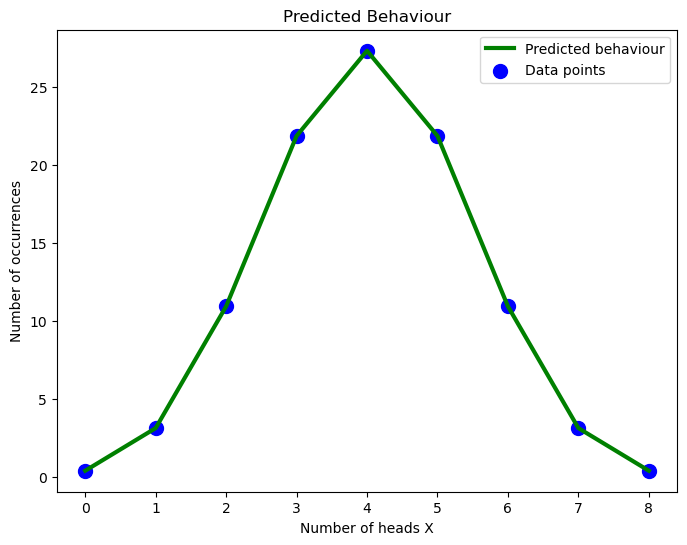

In [16]:
# note len(X) is the size of list (X)
X=np.arange(0,ncoins+1)  # set up X-array
npred=np.zeros(len(X))  # initialise results array

# make npred(X)
for i in range(0,len(X)):
    npred[i]=nrun*pheads(i,ncoins)


# Create a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot with points and joining lines
ax.plot(X, npred, label='Predicted behaviour', linewidth=3, color='green')
ax.scatter(X, npred, c='blue', s=100, label='Data points')

# Set labels and title
ax.set_xlabel('Number of heads X')
ax.set_ylabel('Number of occurrences')
ax.set_title('Predicted Behaviour')

# Show legend
ax.legend()

# Show the Matplotlib plot
plt.show()

#### Simulated coin tosses

Now lets do some random choice generation to simulate tossing our coins many times, and plot the number we see versus the predicted number.

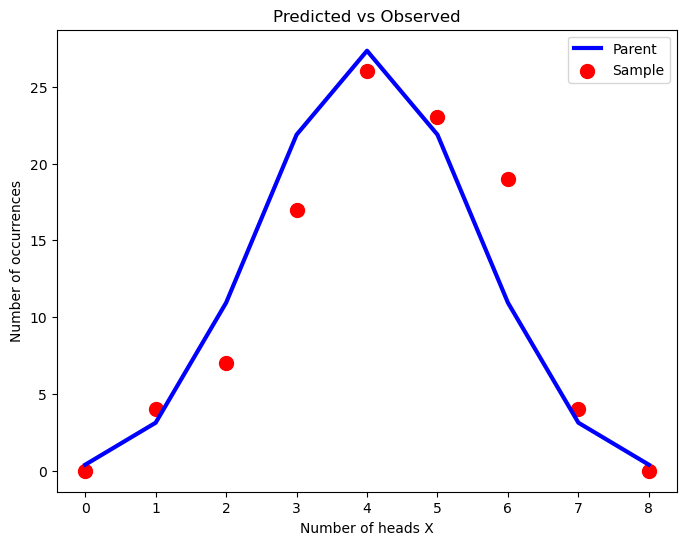

In [17]:
nobs=np.zeros(len(X))  # initialise results array
#print(nobs)

for i in range(0,nrun):
    nH=0 # initialise count
    for j in range(0,ncoins):
        toss=random.choice(coin)
        if toss=="H": 
            nH=nH+1
#    print(nH)     
    nobs[nH]=nobs[nH]+1
    
# Create a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot theory line
ax.plot(X, npred, linewidth=3, color='blue', label='Parent')

# Plot observed values
ax.scatter(X, nobs, c='red', s=100, label='Sample')

# Set labels and title
ax.set_xlabel('Number of heads X')
ax.set_ylabel('Number of occurrences')
ax.set_title('Predicted vs Observed')

# Show legend
ax.legend(loc='upper right')

# Show the Matplotlib plot
plt.show()

Now, lets run the experiment again, and plot the results of the two independent experiments.  We see that the results of the experiments are scattered about the parent distribution, and the average of the two should be closer than either green or red.

In [18]:
nobs2=np.zeros(len(X))  # initialise results array

for i in range(0,nrun):
    nH2=0 # initialise count
    for j in range(0,ncoins):
        toss=random.choice(coin)
        if toss=="H": 
            nH2=nH2+1     
    nobs2[nH2]=nobs2[nH2]+1


#### Random numbers

Suppose we generate some random numbers from an flat distribution 0-1. 
To plot the probability distribution we form bins of width 0.1, and 
then normalise the distributions.


[ 86.  94. 108.  97. 113.  82. 101.  99. 118. 102.] [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


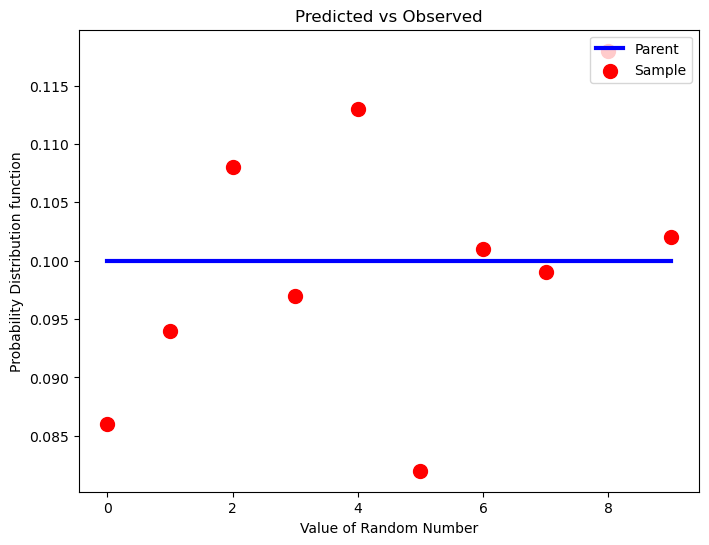

In [21]:
nbins=10
X=np.arange(0,nbins) 
nsample =1000 #  Number of samples
nobs=np.zeros(len(X)) 
npred=np.full(len(X),1.0/nbins)  #  Set the flat parent distribution
binwidth=0.1
for i in range(0,nsample):
    toss=random.random()
    inbin=int(toss/binwidth)  
    nobs[inbin]=nobs[inbin]+1
nobs=nobs/nsample  # to get normalised PDF
    
fig, ax = plt.subplots(figsize=(8, 6))

# Plot theory line
ax.plot(X, npred, linewidth=3, color='blue', label='Parent')

# Plot observed values
ax.scatter(X, nobs, c='red', s=100, label='Sample')

# Set labels and title
ax.set_xlabel('Value of Random Number')
ax.set_ylabel('Probability Distribution function')
ax.set_title('Predicted vs Observed')

# Show legend
ax.legend(loc='upper right')

# Show the Matplotlib plot
plt.show()